# Model development

Apply the model for small instances (e.g. 6 facilities, and 10 oil spills in Hudson)++

Outline of this script:
1. Input data
2. Optimization Model
3. Output in a form of Network Diagram

# Data

In [1]:
# import custom functions
import data_preparation
import custom_func
import model
import model_analysis
# import libraries
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
# Import data
# spill_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='spills', header=0).copy()
# spill_data = spill_data.sample(n=100)
station_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations', header=0).copy()
#station_data = station_data.iloc[[7,9,10, 13,15,16, 18]] # for small scale problem, we select stations nearby Hudson Bay & Strait
input_parameters = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='Estimated parameters', header=0).copy()
sensitivity_dataR = gpd.read_file('Inputs/ArcGIS_data/Sensitivity_data/Sensitivity_data5.shp').copy()

In [3]:
# spill_data.to_excel('Inputs/data_100_oil_spills.xlsx', sheet_name='spills')
spill_data = pd.read_excel('Inputs/data_100_oil_spills.xlsx', sheet_name='spills', header=0).copy()


In [4]:
display(spill_data)
display(station_data)

,Unnamed: 0,Spill #,Coordinates,Spill size,Spill Size Type,Resource needed,1st Ranking,Skimmer,Dispersant,Burning materials
0,73,o74,"(64.50421666200003, -79.40601964599995)",8500,Large,425.0,CDU,0,800,0
1,97,o98,"(73.85872545439102, -77.06292927588505)",4820,Large,241.0,MCR,54,0,0
2,52,o53,"(58.851133884186325, -94.20693472697955)",3200,Large,160.0,ISB,0,0,257
3,177,o178,"(69.45553911240434, -123.85642478117892)",6160,Large,308.0,MCR,54,0,0
4,202,o203,"(65.38888826422587, -65.95218121659215)",5190,Large,259.5,ISB,0,0,257
...,...,...,...,...,...,...,...,...,...,...
95,206,o207,"(61.2787986028355, -114.41660450627202)",6480,Large,324.0,MCR,54,0,0
96,42,o43,"(70.5897855138361, -120.20613457011686)",5790,Large,289.5,ISB,0,0,257
97,191,o192,"(68.70553599203063, -134.23381941293684)",6430,Large,321.5,ISB,0,0,257
98,173,o174,"(72.04548849091111, -119.40991256546548)",800,Small,40.0,CDU,0,100,0


,no.,Station #,Station,Name,Coordinates,skimmers,booms,dispersant,burning,Resources total,Converted resources,Capacity,Unnamed: 12,Unnamed: 13
0,1,s1,Station 1,Beafort sea,"(70,-134)",0,1,33,NaN,34,NaN,0,NaN,NaN
1,2,s2,Station 2,Northwestern passage,"(70.64, -119.43)",8,8,55,NaN,71,NaN,80,NaN,NaN
2,3,s3,Station 3,Kitikmeot Region,"(67.09, -112.32)",1,4,58,NaN,63,NaN,80,NaN,NaN
3,4,s4,Station 4,Fort Smith,"(62.60, -113.19)",10,3,32,NaN,45,NaN,80,NaN,NaN
4,5,s5,Station 5,Hay River,"(60.53, -114.38)",40,10,100,NaN,150,NaN,0,NaN,NaN
5,6,s6,Station 6,NaN,"(68.86,-103.19)",10,3,44,NaN,57,NaN,80,NaN,"(60.758054, -115.789890)"
6,7,s7,Station 7,NaN,"(63.93, -101.14)",0,3,47,NaN,50,NaN,80,NaN,"(58.55084,-93.62352)"
7,8,s8,Station 8,NaN,"(60.06, -95.89)",3,5,58,NaN,66,NaN,80,NaN,"(69.459, -132.974304)"
8,9,s9,Station 9,NaN,"(75.11, -95.71)",5,7,59,NaN,71,NaN,80,NaN,"(63.742885, -68.464958)"
9,10,s10,Station 10,Kivalliq Region,"(63.03, -91.74)",4,9,36,NaN,49,NaN,80,NaN,NaN


## Input parameters

In [5]:
NumberStMax = 4
DistanceMax = 10 # (DistanceMax*80)km  convert it to kilometer, typical speed 20km/hr -> 480km/day
TimeRMax = 220  # covert it into hours or minutes ++

In [6]:
BigM = 5000000
current_vs_proposed = 'proposed' # current
MaxFO = 1
Budget = 20000000
W = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
QuantityMin = 2

FacilityHudson = ['',]

In [7]:
# 
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
= data_preparation.generate_input_data(station_data, spill_data, input_parameters)
coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
coordinates_st = custom_func.extract_station_coordinate(station_data)

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20']


In [8]:
max(Distance.values())

82.62173596329828

In [9]:
print('coordinates_st')
display(coordinates_st)

print('Demand')
display(Demand)
print('Availability')
display(Availability)
print('Eff')
display(Eff)

print('Distance')
display(Distance)

print('TimeR')
display(TimeR)

print('Cf_s'); display(Cf_s)
print('CostU')
display(CostU)

coordinates_st


([[70.0, -134.0],
  [70.63999938964844, -119.43000030517578],
  [67.08999633789062, -112.31999969482422],
  [62.599998474121094, -113.19000244140625],
  [60.529998779296875, -114.37999725341797],
  [68.86000061035156, -103.19000244140625],
  [63.93000030517578, -101.13999938964844],
  [60.060001373291016, -95.88999938964844],
  [75.11000061035156, -95.70999908447266],
  [63.029998779296875, -91.73999786376953],
  [62.66999816894531, -92.70800018310547],
  [73.4000015258789, -88.16000366210938],
  [73.4000015258789, -81.83000183105469],
  [64.2020034790039, -83.91000366210938],
  [71.70999908447266, -74.97000122070312],
  [67.66999816894531, -76.37999725341797],
  [64.62000274658203, -77.41000366210938],
  [68.93000030517578, -69.16999816894531],
  [63.150001525878906, -69.68000030517578],
  [68.93000030517578, -65.56999969482422]],
 {'s1': [70.0, -134.0],
  's2': [70.63999938964844, -119.43000030517578],
  's3': [67.08999633789062, -112.31999969482422],
  's4': [62.599998474121094, -11

Demand


{('o74', 'm'): 0,
 ('o74', 'c'): 31,
 ('o74', 'i'): 0,
 ('o98', 'm'): 0,
 ('o98', 'c'): 31,
 ('o98', 'i'): 0,
 ('o53', 'm'): 0,
 ('o53', 'c'): 110,
 ('o53', 'i'): 0,
 ('o178', 'm'): 0,
 ('o178', 'c'): 0,
 ('o178', 'i'): 157,
 ('o203', 'm'): 0,
 ('o203', 'c'): 5,
 ('o203', 'i'): 0,
 ('o127', 'm'): 0,
 ('o127', 'c'): 5,
 ('o127', 'i'): 0,
 ('o172', 'm'): 0,
 ('o172', 'c'): 0,
 ('o172', 'i'): 7,
 ('o51', 'm'): 0,
 ('o51', 'c'): 0,
 ('o51', 'i'): 37,
 ('o7', 'm'): 0,
 ('o7', 'c'): 0,
 ('o7', 'i'): 37,
 ('o30', 'm'): 100,
 ('o30', 'c'): 0,
 ('o30', 'i'): 0,
 ('o221', 'm'): 100,
 ('o221', 'c'): 0,
 ('o221', 'i'): 0,
 ('o64', 'm'): 0,
 ('o64', 'c'): 0,
 ('o64', 'i'): 37,
 ('o25', 'm'): 0,
 ('o25', 'c'): 0,
 ('o25', 'i'): 37,
 ('o94', 'm'): 0,
 ('o94', 'c'): 0,
 ('o94', 'i'): 7,
 ('o119', 'm'): 0,
 ('o119', 'c'): 110,
 ('o119', 'i'): 0,
 ('o148', 'm'): 2,
 ('o148', 'c'): 0,
 ('o148', 'i'): 0,
 ('o208', 'm'): 0,
 ('o208', 'c'): 110,
 ('o208', 'i'): 0,
 ('o86', 'm'): 0,
 ('o86', 'c'): 110,
 ('o8

Availability


{('s1', 'm'): 80000.0,
 ('s1', 'c'): 100000.0,
 ('s1', 'i'): 160000.0,
 ('s2', 'm'): 100000.0,
 ('s2', 'c'): 180000.0,
 ('s2', 'i'): 80000.0,
 ('s3', 'm'): 180000.0,
 ('s3', 'c'): 20000.0,
 ('s3', 'i'): 160000.0,
 ('s4', 'm'): 200000.0,
 ('s4', 'c'): 200000.0,
 ('s4', 'i'): 80000.0,
 ('s5', 'm'): 120000.0,
 ('s5', 'c'): 120000.0,
 ('s5', 'i'): 40000.0,
 ('s6', 'm'): 100000.0,
 ('s6', 'c'): 40000.0,
 ('s6', 'i'): 140000.0,
 ('s7', 'm'): 200000.0,
 ('s7', 'c'): 160000.0,
 ('s7', 'i'): 40000.0,
 ('s8', 'm'): 140000.0,
 ('s8', 'c'): 100000.0,
 ('s8', 'i'): 60000.0,
 ('s9', 'm'): 60000.0,
 ('s9', 'c'): 80000.0,
 ('s9', 'i'): 80000.0,
 ('s10', 'm'): 40000.0,
 ('s10', 'c'): 160000.0,
 ('s10', 'i'): 100000.0,
 ('s11', 'm'): 140000.0,
 ('s11', 'c'): 80000.0,
 ('s11', 'i'): 140000.0,
 ('s12', 'm'): 120000.0,
 ('s12', 'c'): 180000.0,
 ('s12', 'i'): 160000.0,
 ('s13', 'm'): 80000.0,
 ('s13', 'c'): 20000.0,
 ('s13', 'i'): 160000.0,
 ('s14', 'm'): 160000.0,
 ('s14', 'c'): 180000.0,
 ('s14', 'i'): 80

Eff


{('s1', 'm'): 0.1,
 ('s1', 'c'): 0.7000000000000001,
 ('s1', 'i'): 0.6000000000000001,
 ('s2', 'm'): 0.30000000000000004,
 ('s2', 'c'): 0.2,
 ('s2', 'i'): 0.1,
 ('s3', 'm'): 0.4,
 ('s3', 'c'): 0.9,
 ('s3', 'i'): 0.30000000000000004,
 ('s4', 'm'): 0.30000000000000004,
 ('s4', 'c'): 0.2,
 ('s4', 'i'): 0.9,
 ('s5', 'm'): 0.2,
 ('s5', 'c'): 0.6000000000000001,
 ('s5', 'i'): 0.5,
 ('s6', 'm'): 0.5,
 ('s6', 'c'): 0.5,
 ('s6', 'i'): 0.30000000000000004,
 ('s7', 'm'): 0.4,
 ('s7', 'c'): 0.5,
 ('s7', 'i'): 0.30000000000000004,
 ('s8', 'm'): 0.2,
 ('s8', 'c'): 0.9,
 ('s8', 'i'): 0.30000000000000004,
 ('s9', 'm'): 0.30000000000000004,
 ('s9', 'c'): 1.0,
 ('s9', 'i'): 0.1,
 ('s10', 'm'): 0.1,
 ('s10', 'c'): 0.9,
 ('s10', 'i'): 1.0,
 ('s11', 'm'): 0.5,
 ('s11', 'c'): 0.2,
 ('s11', 'i'): 0.4,
 ('s12', 'm'): 0.2,
 ('s12', 'c'): 0.9,
 ('s12', 'i'): 0.9,
 ('s13', 'm'): 0.30000000000000004,
 ('s13', 'c'): 0.1,
 ('s13', 'i'): 0.30000000000000004,
 ('s14', 'm'): 0.30000000000000004,
 ('s14', 'c'): 0.60000

Distance


{('o74', 's1'): 54.869901934884496,
 ('o74', 's2'): 40.49156344567654,
 ('o74', 's3'): 33.01539383228145,
 ('o74', 's4'): 33.83760408289111,
 ('o74', 's5'): 35.19905444057435,
 ('o74', 's6'): 24.179549221206393,
 ('o74', 's7'): 21.741562470949656,
 ('o74', 's8'): 17.072568947254137,
 ('o74', 's9'): 19.449994856605564,
 ('o74', 's10'): 12.421767498345352,
 ('o74', 's11'): 13.427844700607151,
 ('o74', 's12'): 12.4806713018879,
 ('o74', 's13'): 9.2201208377404,
 ('o74', 's14'): 4.514110434032932,
 ('o74', 's15'): 8.46176922169844,
 ('o74', 's16'): 4.379380986759691,
 ('o74', 's17'): 1.9993727886691577,
 ('o74', 's18'): 11.151847626729145,
 ('o74', 's19'): 9.819846535019586,
 ('o74', 's20'): 14.526631698365959,
 ('o98', 's1'): 57.067679328992526,
 ('o98', 's2'): 42.489164310609084,
 ('o98', 's3'): 35.90093126483362,
 ('o98', 's4'): 37.840778519494805,
 ('o98', 's5'): 39.6259851186469,
 ('o98', 's6'): 26.600964621532054,
 ('o98', 's7'): 26.043905369333796,
 ('o98', 's8'): 23.34231052534236,

TimeR


{('o74', 's1'): 54.869901934884496,
 ('o74', 's2'): 40.49156344567654,
 ('o74', 's3'): 33.01539383228145,
 ('o74', 's4'): 33.83760408289111,
 ('o74', 's5'): 35.19905444057435,
 ('o74', 's6'): 24.179549221206393,
 ('o74', 's7'): 21.741562470949656,
 ('o74', 's8'): 17.072568947254137,
 ('o74', 's9'): 19.449994856605564,
 ('o74', 's10'): 12.421767498345352,
 ('o74', 's11'): 13.427844700607151,
 ('o74', 's12'): 12.4806713018879,
 ('o74', 's13'): 9.2201208377404,
 ('o74', 's14'): 4.514110434032932,
 ('o74', 's15'): 8.46176922169844,
 ('o74', 's16'): 4.379380986759691,
 ('o74', 's17'): 1.9993727886691577,
 ('o74', 's18'): 11.151847626729145,
 ('o74', 's19'): 9.819846535019586,
 ('o74', 's20'): 14.526631698365959,
 ('o98', 's1'): 57.067679328992526,
 ('o98', 's2'): 42.489164310609084,
 ('o98', 's3'): 35.90093126483362,
 ('o98', 's4'): 37.840778519494805,
 ('o98', 's5'): 39.6259851186469,
 ('o98', 's6'): 26.600964621532054,
 ('o98', 's7'): 26.043905369333796,
 ('o98', 's8'): 23.34231052534236,

Cf_s


{'s1': 10000000.0,
 's2': 3000000.0,
 's3': 9000000.0,
 's4': 6000000.0,
 's5': 10000000.0,
 's6': 7000000.0,
 's7': 3000000.0,
 's8': 4000000.0,
 's9': 6000000.0,
 's10': 6000000.0,
 's11': 5000000.0,
 's12': 7000000.0,
 's13': 3000000.0,
 's14': 4000000.0,
 's15': 8000000.0,
 's16': 9000000.0,
 's17': 10000000.0,
 's18': 3000000.0,
 's19': 5000000.0,
 's20': 5000000.0}

CostU


{('s1', 'm'): 12.100000000000001,
 ('s1', 'c'): 84.7,
 ('s1', 'i'): 72.60000000000001,
 ('s2', 'm'): 36.300000000000004,
 ('s2', 'c'): 24.200000000000003,
 ('s2', 'i'): 12.100000000000001,
 ('s3', 'm'): 48.400000000000006,
 ('s3', 'c'): 108.9,
 ('s3', 'i'): 36.300000000000004,
 ('s4', 'm'): 36.300000000000004,
 ('s4', 'c'): 24.200000000000003,
 ('s4', 'i'): 108.9,
 ('s5', 'm'): 24.200000000000003,
 ('s5', 'c'): 72.60000000000001,
 ('s5', 'i'): 60.5,
 ('s6', 'm'): 60.5,
 ('s6', 'c'): 60.5,
 ('s6', 'i'): 36.300000000000004,
 ('s7', 'm'): 48.400000000000006,
 ('s7', 'c'): 60.5,
 ('s7', 'i'): 36.300000000000004,
 ('s8', 'm'): 24.200000000000003,
 ('s8', 'c'): 108.9,
 ('s8', 'i'): 36.300000000000004,
 ('s9', 'm'): 36.300000000000004,
 ('s9', 'c'): 121.0,
 ('s9', 'i'): 12.100000000000001,
 ('s10', 'm'): 12.100000000000001,
 ('s10', 'c'): 108.9,
 ('s10', 'i'): 121.0,
 ('s11', 'm'): 60.5,
 ('s11', 'c'): 24.200000000000003,
 ('s11', 'i'): 48.400000000000006,
 ('s12', 'm'): 24.200000000000003,
 

In [10]:
#max(Distance.values())
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
# normalize
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))

Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min) 
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

In [11]:
Demand


{('o74', 'm'): 0,
 ('o74', 'c'): 31,
 ('o74', 'i'): 0,
 ('o98', 'm'): 0,
 ('o98', 'c'): 31,
 ('o98', 'i'): 0,
 ('o53', 'm'): 0,
 ('o53', 'c'): 110,
 ('o53', 'i'): 0,
 ('o178', 'm'): 0,
 ('o178', 'c'): 0,
 ('o178', 'i'): 157,
 ('o203', 'm'): 0,
 ('o203', 'c'): 5,
 ('o203', 'i'): 0,
 ('o127', 'm'): 0,
 ('o127', 'c'): 5,
 ('o127', 'i'): 0,
 ('o172', 'm'): 0,
 ('o172', 'c'): 0,
 ('o172', 'i'): 7,
 ('o51', 'm'): 0,
 ('o51', 'c'): 0,
 ('o51', 'i'): 37,
 ('o7', 'm'): 0,
 ('o7', 'c'): 0,
 ('o7', 'i'): 37,
 ('o30', 'm'): 100,
 ('o30', 'c'): 0,
 ('o30', 'i'): 0,
 ('o221', 'm'): 100,
 ('o221', 'c'): 0,
 ('o221', 'i'): 0,
 ('o64', 'm'): 0,
 ('o64', 'c'): 0,
 ('o64', 'i'): 37,
 ('o25', 'm'): 0,
 ('o25', 'c'): 0,
 ('o25', 'i'): 37,
 ('o94', 'm'): 0,
 ('o94', 'c'): 0,
 ('o94', 'i'): 7,
 ('o119', 'm'): 0,
 ('o119', 'c'): 110,
 ('o119', 'i'): 0,
 ('o148', 'm'): 2,
 ('o148', 'c'): 0,
 ('o148', 'i'): 0,
 ('o208', 'm'): 0,
 ('o208', 'c'): 110,
 ('o208', 'i'): 0,
 ('o86', 'm'): 0,
 ('o86', 'c'): 110,
 ('o8

# Model Configuration 1
## Table 3 (Row 1)

In [12]:
10**-6

1e-06

In [13]:
import model

In [14]:
model, select, deploy, mvars, names, values, \
        spill_df, station_df, cover_1s, select_1s, deploy_1s, ResponseTimeT, coverage_percentage, assignment  \
    = model.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n,
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax, Distance, Distance_n,
          W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
          BigM, MaxFO)

--------------MIP-moo--------
Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-04
cover
{('o74', 's13'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's14'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's15'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's16'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's17'): <gurobi.Var *Awaiting Model Update*>, ('o74', 's19'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's13'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's15'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's16'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's17'): <gurobi.Var *Awaiting Model Update*>, ('o98', 's18'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's7'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's8'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's10'): <gurobi.Var *Awaiting Model Update*>, ('o53', 's11'): <gurobi.Var *Awaiting Model Update*>, ('o178', 's2'): <gurobi.Var *Awaiting Model Update*>, ('o203', '

In [15]:
assignment

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o98,s18,68.93,-69.169998,73.858727,-77.062927,c,31.0,9.305411
1,o203,s18,68.93,-69.169998,65.388885,-65.952179,c,5.0,4.784752
2,o7,s18,68.93,-69.169998,70.286461,-67.008385,i,37.0,2.551971
3,o94,s18,68.93,-69.169998,67.564018,-62.579475,i,7.0,6.730594
4,o86,s18,68.93,-69.169998,63.019466,-67.156242,c,110.0,6.244167
...,...,...,...,...,...,...,...,...,...
56,o22,s1,70.00,-134.000000,67.670395,-134.398529,c,110.0,2.363448
57,o187,s1,70.00,-134.000000,69.537125,-133.217575,i,7.0,0.909089
58,o198,s1,70.00,-134.000000,70.399017,-131.880280,i,7.0,2.156949
59,o220,s1,70.00,-134.000000,69.243050,-137.326294,i,37.0,3.411335


In [16]:
cover_1s

o74   s13    1.0
o98   s13    1.0
o53   s7     1.0
o203  s18    1.0
o127  s13    1.0
            ... 
o124  s13    1.0
o134  s7     1.0
o82   s18    1.0
o220  s1     1.0
o192  s1     1.0
Length: 75, dtype: float64

In [17]:
select_1s

s7     1.0
s13    1.0
s18    1.0
s1     1.0
dtype: float64

In [18]:
deploy_1s

o98   s18  c     31.0
o53   s7   c    110.0
o203  s18  c      5.0
o51   s13  i     37.0
o7    s18  i     37.0
                ...  
o124  s13  i    157.0
o134  s7   i    157.0
o82   s18  c     31.0
o220  s1   i     37.0
o192  s1   i      7.0
Length: 61, dtype: float64

In [19]:
assignment

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o98,s18,68.93,-69.169998,73.858727,-77.062927,c,31.0,9.305411
1,o203,s18,68.93,-69.169998,65.388885,-65.952179,c,5.0,4.784752
2,o7,s18,68.93,-69.169998,70.286461,-67.008385,i,37.0,2.551971
3,o94,s18,68.93,-69.169998,67.564018,-62.579475,i,7.0,6.730594
4,o86,s18,68.93,-69.169998,63.019466,-67.156242,c,110.0,6.244167
...,...,...,...,...,...,...,...,...,...
56,o22,s1,70.00,-134.000000,67.670395,-134.398529,c,110.0,2.363448
57,o187,s1,70.00,-134.000000,69.537125,-133.217575,i,7.0,0.909089
58,o198,s1,70.00,-134.000000,70.399017,-131.880280,i,7.0,2.156949
59,o220,s1,70.00,-134.000000,69.243050,-137.326294,i,37.0,3.411335


In [20]:
assignment_df = pd.DataFrame(columns=list(assignment.columns.values))
for i,o in enumerate(assignment['Spill #'].unique()):
    minD = min(assignment.loc[assignment['Spill #'] == o]['Distance'])
    df = assignment.iloc[np.where(assignment['Distance'] == minD)[0]]
    assignment_df = pd.concat([assignment_df, df])
assignment_df

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o98,s18,68.930000,-69.169998,73.858727,-77.062927,c,31.0,9.305411
1,o203,s18,68.930000,-69.169998,65.388885,-65.952179,c,5.0,4.784752
2,o7,s18,68.930000,-69.169998,70.286461,-67.008385,i,37.0,2.551971
3,o94,s18,68.930000,-69.169998,67.564018,-62.579475,i,7.0,6.730594
4,o86,s18,68.930000,-69.169998,63.019466,-67.156242,c,110.0,6.244167
5,o93,s18,68.930000,-69.169998,64.239845,-63.442661,c,5.0,7.402698
6,o6,s18,68.930000,-69.169998,67.748711,-63.582039,m,100.0,5.711456
7,o10,s18,68.930000,-69.169998,71.314369,-69.463387,m,100.0,2.402351
8,o106,s18,68.930000,-69.169998,72.811684,-77.538422,c,5.0,9.224856
9,o83,s18,68.930000,-69.169998,63.410500,-68.109001,m,20.0,5.620552


In [21]:
print('Sensitivity_n')
display(Sensitivity_n)

print('Spill_df')
display(spill_df)
print('[item for item in deploy_1s.index]')
display([item for item in deploy_1s.index])
print('cover_1s')
display(cover_1s)
print('select_1s')
display(select_1s)
print('deploy_1s')
display(deploy_1s)
print('deploy_1s.index')
display(deploy_1s.index)

Sensitivity_n


{'o74': 0.9797979797979798,
 'o98': 0.16161616161616163,
 'o53': 0.6464646464646465,
 'o178': 0.2828282828282828,
 'o203': 0.3939393939393939,
 'o127': 1.0,
 'o172': 0.2828282828282828,
 'o51': 0.6666666666666666,
 'o7': 0.1111111111111111,
 'o30': 0.030303030303030304,
 'o221': 0.8383838383838383,
 'o64': 0.8484848484848485,
 'o25': 0.8383838383838383,
 'o94': 0.09090909090909091,
 'o119': 0.2727272727272727,
 'o148': 0.5050505050505051,
 'o208': 0.0,
 'o86': 0.3939393939393939,
 'o93': 0.09090909090909091,
 'o108': 0.6363636363636364,
 'o131': 0.6767676767676768,
 'o6': 0.3939393939393939,
 'o10': 0.16161616161616163,
 'o41': 0.2828282828282828,
 'o144': 0.5050505050505051,
 'o169': 0.2828282828282828,
 'o185': 0.8383838383838383,
 'o87': 0.020202020202020204,
 'o168': 0.2828282828282828,
 'o24': 0.23232323232323232,
 'o190': 0.24242424242424243,
 'o97': 0.6666666666666666,
 'o162': 0.20202020202020202,
 'o106': 0.16161616161616163,
 'o157': 0.5050505050505051,
 'o175': 0.28282828282

Spill_df


,Spill #,Spill_Latitude,Spill_Longitude,Resource needed,Sensitivity
0,o74,64.504219,-79.406021,8500,104.0
1,o98,73.858727,-77.062927,4820,23.0
2,o53,58.851135,-94.206932,3200,71.0
3,o178,69.455536,-123.856422,6160,35.0
4,o203,65.388885,-65.952179,5190,46.0
...,...,...,...,...,...
95,o207,61.278797,-114.416603,6480,7.0
96,o43,70.589783,-120.206131,5790,35.0
97,o192,68.705536,-134.233826,6430,10.0
98,o174,72.045486,-119.409912,800,35.0


[item for item in deploy_1s.index]


[('o98', 's18', 'c'),
 ('o53', 's7', 'c'),
 ('o203', 's18', 'c'),
 ('o51', 's13', 'i'),
 ('o7', 's18', 'i'),
 ('o64', 's7', 'i'),
 ('o25', 's1', 'i'),
 ('o94', 's18', 'i'),
 ('o148', 's7', 'm'),
 ('o86', 's18', 'c'),
 ('o93', 's18', 'c'),
 ('o131', 's7', 'i'),
 ('o6', 's18', 'm'),
 ('o10', 's18', 'm'),
 ('o144', 's7', 'i'),
 ('o169', 's1', 'c'),
 ('o185', 's1', 'c'),
 ('o190', 's7', 'i'),
 ('o97', 's13', 'i'),
 ('o106', 's18', 'c'),
 ('o136', 's7', 'i'),
 ('o145', 's7', 'i'),
 ('o3', 's7', 'i'),
 ('o27', 's1', 'c'),
 ('o9', 's13', 'i'),
 ('o212', 's7', 'c'),
 ('o139', 's7', 'i'),
 ('o214', 's7', 'm'),
 ('o191', 's7', 'm'),
 ('o104', 's13', 'i'),
 ('o184', 's1', 'c'),
 ('o83', 's18', 'm'),
 ('o114', 's13', 'm'),
 ('o91', 's18', 'm'),
 ('o138', 's7', 'm'),
 ('o183', 's1', 'i'),
 ('o11', 's13', 'm'),
 ('o181', 's1', 'c'),
 ('o48', 's13', 'm'),
 ('o117', 's13', 'i'),
 ('o44', 's18', 'i'),
 ('o109', 's13', 'i'),
 ('o109', 's18', 'i'),
 ('o59', 's7', 'm'),
 ('o121', 's13', 'i'),
 ('o13', 's7

cover_1s


o74   s13    1.0
o98   s13    1.0
o53   s7     1.0
o203  s18    1.0
o127  s13    1.0
            ... 
o124  s13    1.0
o134  s7     1.0
o82   s18    1.0
o220  s1     1.0
o192  s1     1.0
Length: 75, dtype: float64

select_1s


s7     1.0
s13    1.0
s18    1.0
s1     1.0
dtype: float64

deploy_1s


o98   s18  c     31.0
o53   s7   c    110.0
o203  s18  c      5.0
o51   s13  i     37.0
o7    s18  i     37.0
                ...  
o124  s13  i    157.0
o134  s7   i    157.0
o82   s18  c     31.0
o220  s1   i     37.0
o192  s1   i      7.0
Length: 61, dtype: float64

deploy_1s.index


MultiIndex([( 'o98', 's18', 'c'),
            ( 'o53',  's7', 'c'),
            ('o203', 's18', 'c'),
            ( 'o51', 's13', 'i'),
            (  'o7', 's18', 'i'),
            ( 'o64',  's7', 'i'),
            ( 'o25',  's1', 'i'),
            ( 'o94', 's18', 'i'),
            ('o148',  's7', 'm'),
            ( 'o86', 's18', 'c'),
            ( 'o93', 's18', 'c'),
            ('o131',  's7', 'i'),
            (  'o6', 's18', 'm'),
            ( 'o10', 's18', 'm'),
            ('o144',  's7', 'i'),
            ('o169',  's1', 'c'),
            ('o185',  's1', 'c'),
            ('o190',  's7', 'i'),
            ( 'o97', 's13', 'i'),
            ('o106', 's18', 'c'),
            ('o136',  's7', 'i'),
            ('o145',  's7', 'i'),
            (  'o3',  's7', 'i'),
            ( 'o27',  's1', 'c'),
            (  'o9', 's13', 'i'),
            ('o212',  's7', 'c'),
            ('o139',  's7', 'i'),
            ('o214',  's7', 'm'),
            ('o191',  's7', 'm'),
            ('

In [22]:
data_st_selected = station_df[station_df['Station no.'].isin(select_1s.reset_index())]

In [23]:
ss2 = select_1s.reset_index()
ss2.columns
ss3 = select_1s.reset_index().rename({'index':'StationNo'}, axis=1)
display(ss3)

,StationNo,0
0,s7,1.0
1,s13,1.0
2,s18,1.0
3,s1,1.0


## Fig5a Network Diagram with 4 stations inc. Hay River as hub

H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\mip_venv\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\mip_venv\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o98,s18,68.930000,-69.169998,73.858727,-77.062927,c,31.0,9.305411
1,o203,s18,68.930000,-69.169998,65.388885,-65.952179,c,5.0,4.784752
2,o7,s18,68.930000,-69.169998,70.286461,-67.008385,i,37.0,2.551971
3,o94,s18,68.930000,-69.169998,67.564018,-62.579475,i,7.0,6.730594
4,o86,s18,68.930000,-69.169998,63.019466,-67.156242,c,110.0,6.244167
5,o93,s18,68.930000,-69.169998,64.239845,-63.442661,c,5.0,7.402698
6,o6,s18,68.930000,-69.169998,67.748711,-63.582039,m,100.0,5.711456
7,o10,s18,68.930000,-69.169998,71.314369,-69.463387,m,100.0,2.402351
8,o106,s18,68.930000,-69.169998,72.811684,-77.538422,c,5.0,9.224856
9,o83,s18,68.930000,-69.169998,63.410500,-68.109001,m,20.0,5.620552


H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\mip_venv\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


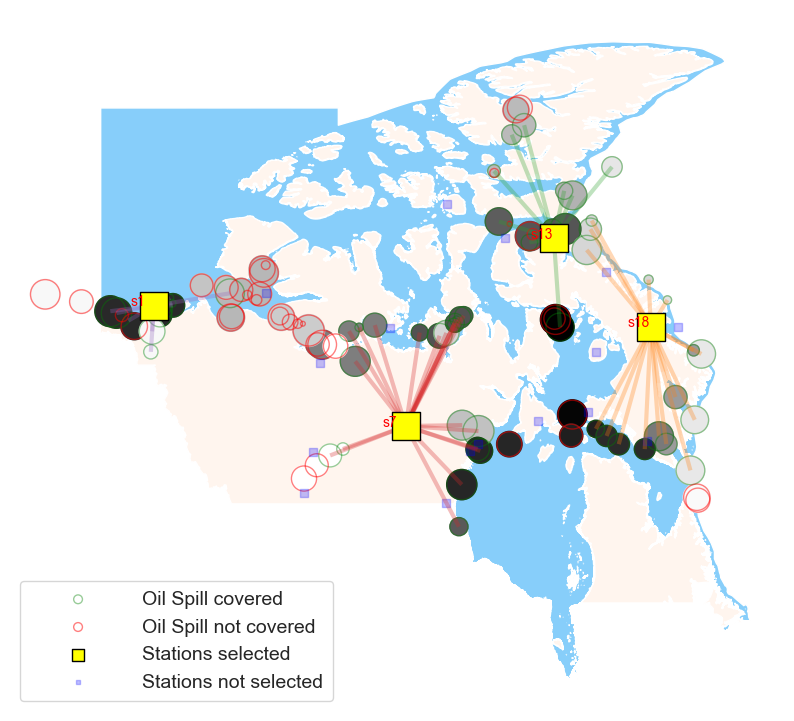

In [24]:
model_analysis.draw_network_diagram(DistanceMax, NumberStMax, Sensitivity_R, spill_df, station_df, ResponseTimeT, coverage_percentage,
                         assignment, deploy_1s, select_1s, current_vs_proposed)

### Outputs (coverage percentage & mean Response Time)

In [25]:
print(coverage_percentage)
print(ResponseTimeT)

21
0


## Table 4: Resource deployment from facilities

In [26]:

selected_st_name = select_1s.reset_index()
selected_st_name

,index,0
0,s7,1.0
1,s13,1.0
2,s18,1.0
3,s1,1.0


In [27]:
deploy_1s

o98   s18  c     31.0
o53   s7   c    110.0
o203  s18  c      5.0
o51   s13  i     37.0
o7    s18  i     37.0
                ...  
o124  s13  i    157.0
o134  s7   i    157.0
o82   s18  c     31.0
o220  s1   i     37.0
o192  s1   i      7.0
Length: 61, dtype: float64

In [28]:
deploy_df = pd.DataFrame(deploy_1s.reset_index())
deploy_df
#deploy_df.columns = ['St', 'os', 'rr','amount']
#print(deploy_df.columns)

,level_0,level_1,level_2,0
0,o98,s18,c,31.0
1,o53,s7,c,110.0
2,o203,s18,c,5.0
3,o51,s13,i,37.0
4,o7,s18,i,37.0
...,...,...,...,...
56,o124,s13,i,157.0
57,o134,s7,i,157.0
58,o82,s18,c,31.0
59,o220,s1,i,37.0


In [29]:
max(Distance_n.values())

1.0

In [30]:
selected_st_name.index

RangeIndex(start=0, stop=4, step=1)

In [31]:
resource_deployment_from_facility = pd.DataFrame(columns=['M','C','I'])
for index, st in enumerate(selected_st_name):
    a = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'm'), 0].sum()
    b = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'c'), 0].sum()
    c = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'i'), 0].sum()
    resource_deployment_from_facility.loc[index] = [a,b,c]
    
resource_deployment_from_facility.index=selected_st_name
resource_deployment_from_facility

ValueError: Length mismatch: Expected axis has 2 elements, new values have 4 elements

In [ ]:
#deploy_1s
sum(Distance.values()) / len(Distance)
max(Distance.values())

In [ ]:
display(select_1s)
#display(station_df[station_df['Station no.'].isin(select_1s.reset_index().level_0)])
display(spill_df)

In [ ]:
selected_supply_stations = list(deploy_1s.reset_index().level_1.unique())
len(selected_supply_stations)#.shape[0]
data_st_selected = station_df[station_df['Station no.'].isin(select_1s.reset_index().level_0)].reset_index()
import matplotlib.pyplot as plt

In [ ]:
#data_st_selected.loc[:, 'Station no.'][i] #+ 1

In [ ]:
# Input param
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
= data_preparation.generate_input_data(potential_station_data, spill_data, input_parameters)
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
# normalize
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))
Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min)
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

# Model
model, select, deploy, mvars, names, values, \
        spill_df, station_df, select_1s, deploy_1s, ResponseTimeT, coverage_percentage, assignment  \
    = model.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n, \
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax, Distance, Distance_n, DistanceMax,  Cf_s, CostU)

# Draw the network
model_analysis.draw_network_diagram(DistanceMax, NumberStMax, Sensitivity_R, spill_df, station_df, ResponseTimeT, coverage_percentage,
                         assignment, deploy_1s, select_1s)

In [ ]:
#import model_analysis

In [ ]:
model_analysis.draw_network_diagram(DistanceMax, NumberStMax, Sensitivity_R, spill_df, station_df, ResponseTimeT, coverage_percentage,
                         assignment, deploy_1s, select_1s)

In [ ]:
import pandas as pd
df = pd.DataFrame()
#df['ll'] = list([2,10])
#df.loc[1]

In [ ]:
df

In [ ]:
assignment.columns

In [ ]:
assignment

In [ ]:
display(assignment)
display(deploy_1s)

In [ ]:
deploy_reset = deploy_1s.reset_index()
deploy_reset.columns = ['Station no.', 'Spill #', 'Resource Type', 'Quantity deployed']

In [ ]:
display(assignment)

In [ ]:
from matplotlib import collections as mc
import matplotlib.pyplot as plt
unique_stations = assignment['Station no.'].unique()

fig, ax = plt.subplots()
ArcticMap = gpd.read_file("Inputs/ArcGIS_data/ArcticShapefile2/ArcticShapefile2.shp")
ArcticMap = ArcticMap.to_crs(epsg=4326)  # 3857
ArcticLand = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic'])]
ArcticLand.plot(ax=ax, color="seashell")

for ust in range(len(unique_stations)):
    d1 = assignment.loc[assignment['Station no.'] == unique_stations[ust]].reset_index()
    d_m = pd.DataFrame(d1.loc[d1['Resource Type'] == 'm'].copy())
    d_c = d1.loc[d1['Resource Type'] == 'c'].copy()
    d_i = d1.loc[d1['Resource Type'] == 'i'].copy()

    new_list_m = []
    for r1 in range(d_m.shape[0]):
        new_list_m.append([(d_m.loc[r1, 'Spill_Longitude'], d_m.loc[r1, 'Spill_Latitude']), (d_m.loc[r1, 'St_Longitude'], d_m.loc[r1, 'St_Latitude'])])
        # d_m.loc[2, 'Spill_Longitude']
        # new_list_m.append([(d_m.Spill_Longitude[r1], d_m.Spill_Latitude[r1]), (d_m.St_Longitude[r1], d_m.St_Latitude[r1])])
        lc_m = mc.LineCollection(new_list_m, colors=f'C{ust + 1}',
                           alpha=.7, linestyle='dashed')  # 'Resource Type' alpha = (ust/len(unique_stations)), colors=ust, linewidths=[1,5,10],
    ax.add_collection(lc_m)

In [ ]:
d_m.loc[2, 'Spill_Longitude']

In [ ]:
d_m.Spill_Longitude[0]

In [ ]:
print(d_m.shape)
print(d1.shape) #.Spill_Longitude[1]
print(d_m.shape[0])
display(d1)
display(d_m)

In [ ]:
d_m
#df.loc[df['col1'] == value]

In [ ]:
assignment.loc[assignment['Station no.'] == unique_stations[ust]].reset_index()

# Model Configuration 2

## Fig5b

# Pareto Front


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_pareto_front = pd.read_excel('Outputs/pareto front.xlsx', sheet_name='pareto front2')
data_pareto_front

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data=data_pareto_front, x='Max Coverage', y='Min Cost',
            alpha=0.5, edgecolors='b', s=200, color='g')
plt.xlabel('Max Coverage')
plt.ylabel('Min Cost')
plt.grid(False)
plt.tight_layout()
plt.savefig('Outputs/pareto_front.png', transparent=True)

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data=data_pareto_front, x='Max Coverage', y='Min Cost',
            alpha=0.5, edgecolors='b', s=200, color='g')
plt.scatter(data=data_pareto_front, x='Max', y='Min',
            alpha=0.5, edgecolors='black', s=200, color='r')
Max = data_pareto_front[['Max']]
Min = data_pareto_front[['Min']]
plt.plot(Max, Min,
            ls='--', alpha=0.5, color='r')
plt.xlabel('Max Coverage')
plt.ylabel('Min Cost')
plt.grid(False)
plt.tight_layout()
#plt.axis('off')
plt.savefig('Outputs/pareto_frontier_points.png', transparent=True)